# Introduction to Reaction Time Data Analysis

*November 5th, 2023*

Our goals today will be to:

1. Import your reaction time (RT) data and compare descriptive statistics.
2. Visualize data using histograms, boxplots, and violin plots.
3. Develop intuition about random variables, probability distributions, and probability density functions.
4. Introduce the concept of hypothesis testing.

Next week, we will try to:

1. Dive into hypothesis and random variables a bit more.
2. Practice reading scientific articles about reaction time analysis.
3. Design studies based on reaction time.


## Basics

If this is your first time programming, you will likely need to install the following:

1. A code editor. I recommend [VSCode](https://code.visualstudio.com/)
2. The latest version of [Python](https://www.python.org/downloads/). There are other programming languages we can use, but Python is the most common in science and easy to pick up.
3. Packages:
   1. [matplotlib](https://matplotlib.org/)
   2. [scipy](https://docs.scipy.org)
   3. [numpy](https://numpy.org)
   4. [pandas](https://pandas.pydf_elapsed.org)
   5. [seaborn](https://seaborn.pydf_elapsed.org)

### A1: Running (maybe) your first Jupyter code

Run the following cell to check the version of Python you are running, and the versions of the installed packages above (and, if not installed already, install them):

In [12]:
import sys 
from subprocess import check_output

print(f"Python version: {sys.version}\n\nInstalled packages:")
print(check_output(['pip', 'freeze']).decode('ascii'))

Python version: 3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)]

Installed packages:
asttokens==2.4.1
colorama==0.4.6
comm==0.1.4
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
exceptiongroup==1.1.3
executing==2.0.1
fonttools==4.44.0
ipykernel==6.26.0
ipython==8.17.2
jedi==0.19.1
jupyter_client==8.5.0
jupyter_core==5.5.0
kiwisolver==1.4.5
matplotlib==3.8.1
matplotlib-inline==0.1.6
nest-asyncio==1.5.8
numpy==1.26.1
packaging==23.2
pandas==2.1.2
parso==0.8.3
Pillow==10.1.0
platformdirs==3.11.0
prompt-toolkit==3.0.39
psutil==5.9.6
pure-eval==0.2.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
pytz==2023.3.post1
pywin32==306
pyzmq==25.1.1
scipy==1.11.3
seaborn==0.13.0
six==1.16.0
stack-data==0.6.3
tornado==6.3.3
traitlets==5.13.0
tzdata==2023.3
wcwidth==0.2.9



In [13]:
from pathlib import Path 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing and Exploring Data

Next, we will want to import our data and view it. To do this, we will use the library `pandas`, which we abbreviate as `pd`. To access functions in this library, we type `pd.[FUNCTION NAME]`. 

The data file I want to load is located in `resources/reaction_time/data/dy_elapsed_vs_actual.csv`. If we open it as-is, we will see that there are two types of data, organized into separate rows: 

1. elapsed times (the time between when I pressed 'start' and when the colour of the box changed), and 
2. actual times (the time between when the colour of the box changed and when I pressed 'stop')

Normally, we want to organize different types of data as *columns* and individual measurements as *rows*. Thus, after using the `pd.read_csv` function to import the CSV file, we access its `.T` method, which 'transposes' (flips) the columns and rows.

Next, we view the following:

- `data.head()` views the first 5 rows of the data.
- `data.tail()` views the last 5.
- `data.describe()` shows summary statistics (e.g. mean, count) for each column of data.
- `data.info()` gives us information about the **dataframe** object, which refers to the particular scheme with which `pandas` represents data.

In [14]:
# dataframe of data with elapsed times
df_elapsed = pd.read_csv('../resources/reaction_time/data/dy_elapsed_vs_actual.csv', header=None, index_col=0).T

print(df_elapsed.head(), df_elapsed.tail(), df_elapsed.describe(), df_elapsed.info(), sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Elapsed Times  30 non-null     float64
 1   Actual Times   30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes
0  Elapsed Times  Actual Times
1          3.551         0.431
2          3.915         0.315
3          3.068         0.383
4          4.624         0.312
5          4.744         0.334

0   Elapsed Times  Actual Times
26          2.837         0.363
27          1.515         0.360
28          1.690         0.332
29          3.585         0.297
30          3.901         0.317

0      Elapsed Times  Actual Times
count      30.000000     30.000000
mean        3.732633      0.364067
std         1.457071      0.086821
min         1.005000      0.283000
25%         2.867250      0.318000
50%         3.879000      0.334000
75%         4.829500      0.379500
max         5.929000  

### Creating a DataFrame

The data we collected last week can either be imported as a CSV file, as above, or directly used to create a dataframe in Python. Below, I created a dataframe using random values. For instance, the column `colin` was created by making a list of normally distributed numbers with mean 0.4 and standard deviation 0.06. If I had actual measurements, I would simply write `colin=[a, b, c, d, ...]` instead.

In [15]:
# set a random seed
np.random.seed(3112023)

# number of measurements
n = 30

# create a new dataframe 
df_1 = pd.DataFrame.from_dict(
    dict(
        colin=0.4 + np.random.randn(n)*0.06,
        audrey=0.3 + np.random.randn(n)*0.06 + np.random.exponential(0.1, n),
        blake=0.38 + np.random.randn(n)*0.06 + np.random.exponential(0.05, n),
        delbert=0.35 + np.random.randn(n)*0.07 + np.random.laplace(0.1, 0.01, n)
    )
)

df_1.head()

,colin,audrey,blake,delbert
0,0.421256,0.433080,0.627752,0.400545
1,0.252329,0.409546,0.411540,0.485787
2,0.306081,0.360850,0.352472,0.548698
3,0.420134,0.205928,0.423032,0.370634
4,0.429570,0.387652,0.385149,0.382522


In [16]:
# summary statistics
df_1.describe()

,colin,audrey,blake,delbert
count,30.000000,30.000000,30.000000,30.000000
mean,0.381439,0.401923,0.439905,0.456264
std,0.061442,0.136469,0.093587,0.057225
min,0.252329,0.205928,0.324283,0.324223
25%,0.341071,0.323696,0.378509,0.408350
50%,0.380621,0.387254,0.411877,0.464050
75%,0.427697,0.434862,0.459905,0.505946
max,0.487083,0.936606,0.672645,0.548698


### Working with dataframes

Think of dataframes as an apartment building. To access a specific apartment, we need to know which floor its on, and its number on that floor. Similarly, to access data in a dataframe, we need to know where it is.
<div>
<img src="https://assets.bwbx.io/images/users/iqjWHBFdfxIU/ixPdSl7.SV8A/v1/-1x-1.jpg" width=300/>
</div>

Whenever we want to retrieve or access data from a dataframe or other data-containing object, we need to ***index*** the object. ***Indexers*** are the coordinates in the object that contain the data. 
- By convention, indexers are always written as `[row ?, column ?]`. The `?` can either be an 'label' or a number.
- We use the function `iloc` when using row and column **positions** (e.g "1st row", "5th column").
  - In Python, ***everything starts from zero***. So, instead of 'row 1', we say 'row 0', and 'column 4' means 'column 5.'
  - A **negative** index ***starts from the end***. So, the index `-1` gives us the last element in a list, `-2` the second last, and so on.
- We use `loc` when using **labels** (e.g. "the row named `S1`", "the column `Marks`").
- `iloc` and `loc` are usually used to access **entire rows or columns**. 
  - For instance, `df.iloc[:,1]` grabs the entire second column. The colon `:` specifies "**all values** in that row/column." 
  - Similarly, `df.loc["S1", :]` gives us the entire row labelled `S1`. 
- To access **individual items**, we use `iat` and `at`. For these, colons `:` cannot be used, because we need to specify every coordinate to obtain an individual item.

<div>
<img src="https://pynative.com/wp-content/uploads/2021/02/dataframe.png" width=700>
</div>

#### A2a: DataFrames

For each task below, create a new cell and access the following items from `df_1`:

1. The 3rd column, using both position-based and label-based indexing.
2. Rows 1 and 3, together. That is, in a single dataframe.
3. Columns `blake` and `audrey`, together.
4. The 5th-last item in the column `colin`.
5. Using `iloc`, create a dataframe that reverses the order of the columns.


#### A2b: Using your own data

Next, add a cell to create a new dataframe called `df_2` with your own data. Then, using `df_2`:
1. Use the `describe()` **method** to compute means, quartiles, and standard deviations of everyone's RT measurements.
2. What conclusions can you make from the data? Can you unequivocally say that any of us is/are faster or slower than the others?

*Note: a **method** differs from a **function** in that a function can be called directly from the library (e.g. `read_csv` can be called as `pd.read_csv`, whereas a method is attached to a specific object (e.g. `pd.describe` does not exist, and is only defined and only usable in reference to an existing DataFrame (e.g. `df_1.describe()`)*

## Visualizing the Data

Next, we want to visualize, or graph, our data. I'll work only with `df_1`, because I want you to analyze the `df_elapsed` dataframe independently.

First, we want to look at how the data are distributed. The most natural way of doing this is to use a histogram. 

Second, we are generally interested in seeing if there are any patterns in the data. For example, does reaction time tend to improve with practice? If so, we might expect that later trials have faster times than earlier trials. We can visualize this by plotting trial numbers against reaction times.

Add a cell below to:

1. Describe what a **histogram** is.
2. Describe what a **scatter plot** is.
3. Write at least one other hypothesis about a potential pattern in the data, and how you can visualize the data to test this.

In [17]:
plt.style.use('default')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 120

### Introduction to Histograms

To create a histogram, we will use the `seaborn` library, abbreviated as `sns`. Specifically, we will use the `histplot` function: 
[https://seaborn.pydata.org/generated/seaborn.histplot.html](https://seaborn.pydata.org/generated/seaborn.histplot.html)

#### A3: Histograms

Customize the function below to make the following adjustments. Write each function in a new cell.

<div>
<ol>
    <li>
        Change the y-axis value to reflect probabilities, rather than raw counts.
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Cumulative_vs_normal_histogram.svg/1200px-Cumulative_vs_normal_histogram.svg.png" width="500"/>
    </li>
    <li>
        Use 15 bins, each with a width of 0.1. What happens if you change the bin number? Bin size?
        <br>
        <img src="https://www.researchgate.net/publication/319008451/figure/fig1/AS:566697275740160@1512122567782/Histogram-illustration-with-a-bin-width-i-i14i-i14i-i14i-i14-of-i-ii-i-i-ii.png" width="500">
    </li>
    <li>
        Show a cumulative distribution.
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Cumulative_vs_normal_histogram.svg/1200px-Cumulative_vs_normal_histogram.svg.png" width="500"/>
    </li>
    <li>
        Show a cumulative distribution with stacked bars. e.g. if the y-axis is the number of RTs in the bin `0.5-0.55`, then the height of this bin should be the *total* number of measurements in the dataset, stratified by colour. 
        <br>
        <img src="https://community.fabric.microsoft.com/t5/image/serverpage/image-id/499860i215498F4A9D69F0D/image-size/large?v=v2&px=999" width="500"/>
    </li>
    <li>
        Show a regular histogram, but instead of layering histograms on top of each other, show the bars for each bin side-by-side.
        <br>
        <img src="https://i.stack.imgur.com/109oo.png" width="500"/>
    </li>
</ol>
</div>

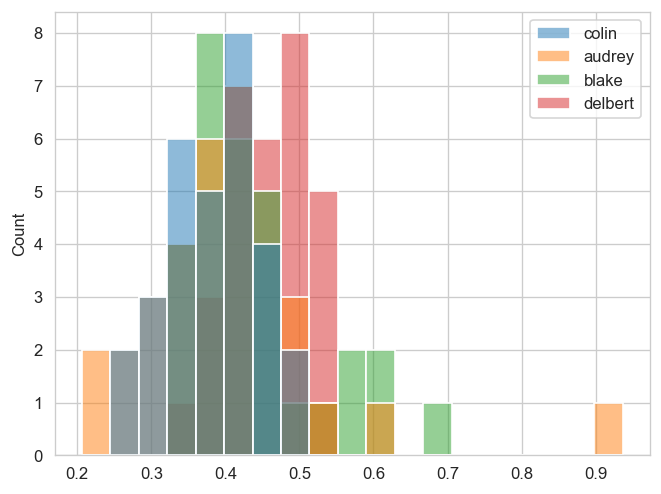

In [18]:
# create a histogram
ax = sns.histplot(data=df_1)

#### A4: Subplots

Finally, using `matplotlib`, which we abbreviated as `plt`, create a graph that satisfies the following:

- each histogram is in a separate plot, in a 2x2 grid
- each subplot is titled with the corresponding column header
- the overall plot is titled "Reaction Time Histograms"
- the x-axes labels for only the bottom two plots are labelled "Reaction Time (s)"
- the y-axes labels for only the two left-most plots are labelled "Probability"
- all bars are blue
- no gridlines are shown

Here is an example of a 2x2 plot of histograms:

<img align="center" src="https://i.stack.imgur.com/4Yw5J.png" width=500/>

### Probability density functions

Another useful way to visualize the data is by showing the smooth line of an estimated function that approximates the probability density at each RT. For example, if our probability density function (pdf) is $f$, where $x$ is a given reaction time, then $f(x)$ is the probability of observing a reaction time of $x$.

Read the following example: 
[https://en.wikipedia.org/wiki/Probability_density_function#Example](https://en.wikipedia.org/wiki/Probability_density_function#Example), and the introduction to that article.

<div>
<img src="https://d2cyt36b7wnvt9.cloudfront.net/exams/wp-content/uploads/2022/04/16173352/vcxz.jpg" width=500" />
</div>

#### A5: Probability density and random variables.

Add a cell below and write:

1. What is a ***random variable***?
2. What is the difference between ***probability*** and ***probability density***?
3. What is a ***probability density function***? Use a concrete example, such as our RT data or the bacterial survival time example.
4. Describe what an ***integral*** is.
5. Explain why the area under the curve of a pdf is always equal to one.
6. Explain why a pdf can have heights greater than one. That is, why can probability densities, but not probabilities, be greater than one?
7. Explain why a pdf $f$ evaluated at a single point $x$ technically always returns zero. That is, $f(x) = 0$ for all values of $x$.

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230527112541/Probability-1.png" width=500 />
</div>

### Kernel density estimation

We can approximate a probability density function using a function known as a Kernel Density Estimator (KDE). 

Imagine you have a set of a data points. Each point is an observation of a random variable that we assume has an underlying distribution that governs the 'randomness.' However, we don't know the mathematical formula for the distribution, so we use a KDE instead. A KDE has two parts:

1. The **kernel** is a function of a known distribution, such as a bell curve (normal distribution), that is placed at each point in the dataset.
2. The **density estimation** part comes in by adjusting the parameters of each individual distribution so that they are centered at respective points and overlap with adjacent points. Together, they create a smooth curve that estimate the underlying pdf.

<!-- In simpler terms, KDE smoothes out your data. It takes each data point, puts a little curve on it, and then adds up all these curves. The more data points you have, the smoother and more accurate the estimation of the underlying distribution becomes.  -->

A KDE is useful because it gives us a way to visualize and understand the distribution of our data, especially when we don't know the exact mathematical formula describing it.

#### A6: KDEs

A simple `kde=True` option in `sns.histplot` allows us to produce KDEs. Modify the following cell to produce a graph where:

- two subplots are in a 1x3 grid (one row, three columns)
- an overall figure title "KDE Estimation"
- for the left subplot,
  - show both the KDE and histogram bars, but make the bars more transparent (an `alpha` value of 0.3). Hint: check the `kwargs` argument in the documentation for `sns.histplot` (https://seaborn.pydata.org/generated/seaborn.histplot.html).
  - instead of counts, plot probability density.
- for the middle subplot,
  - show the KDEs only (hint: check out `sns.kdeplot`)
  - instead of just showing the outlines of each KDE, fill them in with respective colours
- for the rightmost subplot,
  - show the KDEs only
  - instead of allowing KDEs to overlap, stack them so that the total height represents the summed density of each RT

<Axes: ylabel='Density'>

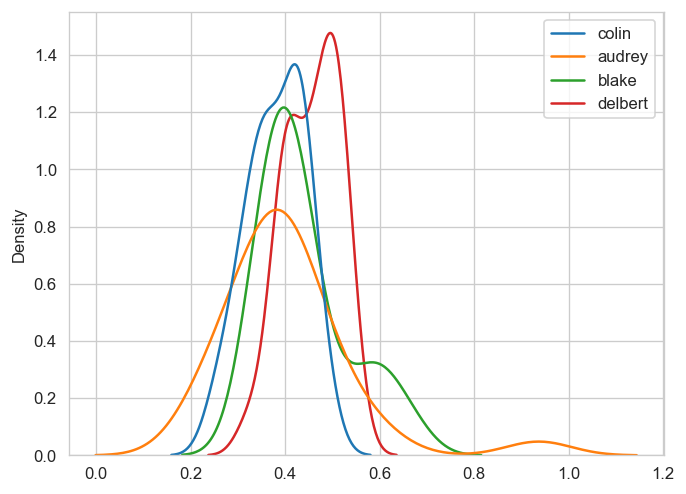

In [23]:
sns.kdeplot(data=df_1)

### Box and violin plots

<img src="https://miro.medium.com/v2/resize:fit:1040/1*TTMOaNG1o4PgQd-e8LurMg.png" width=500>

Box plots are another good way to visualize the distribution of data. Add a cell below and answer the following questions:

1. Define a ***percentile***. What is the difference between a percentile, quantile, quintile, and quartile?
2. What is the ***interquartile range*** (IQR)?
3. What does the spacing between subsections of a boxplot indicate? 
4. What do the ***whiskers*** on a boxplot indicate?
5. Describe the spacing between subsections and whiskers of a boxplot, if the data follow a normal distribution. For example, the distance between the lower whisker and bottom edge, the bottom edge and middle line, middle line and top edge, etc.
6. Using the concept of probability densities, explain the difference between boxplots and violin plots. 
7. When would you use a boxplot versus a violin plot? If you start with a boxplot, can it tell you whether you should try a violinplot instead?

#### A7: Box and violin plots

In a 1x2 grid, create a box plot on the left and a violin plot on the right.
- If you use colours, make sure they match. Hint: use `sns.boxplot`.
- For the violin plot, show the individual data points instead of a miniature boxplot. Hint: use the `inner` argument in `sns.violinplot`.
- Try to have only one legend, on the outside of the right subplot. Hint: use `plt.legend` and specify the `loc` and `bbox_to_anchor` arguments.

## Hypothesis Testing

<img src="https://www.fieldtriptoolbox.org/assets/img/example/stratify/twodistributions.png" width=500>

For many experiments, we expect that repeat measurements exhibit variation. We model this variation mathematically using statistical models. For instance, if we have measurements of two individuals, we assume each individual has their own associated distribution. The question then boils down to comparisons of their distributions.

We will leave formal treatment of these problems for a latter, more extensive, discussion, but, for now, I want you to think about the following:

- How many measurements do we need in order to accurately estimate a distribution? Will we ever have enough? 
- Can we determine how many measurements we need before doing any experiments? *Hint: think about what we aim to do, i.e. compare two or more distributions.*
- On episteomological (i.e. philosophical) grounds, we can never truly 'prove' anything. Instead, we can only disprove or reject hypotheses. 
  - In the context of "comparing distributions," what are we "rejecting"?
  - Do we always *know* what to "reject"? Why or why not?

## Extensions

Text(0.5, 0.98, 'Reaction Time vs Reaction Speed')

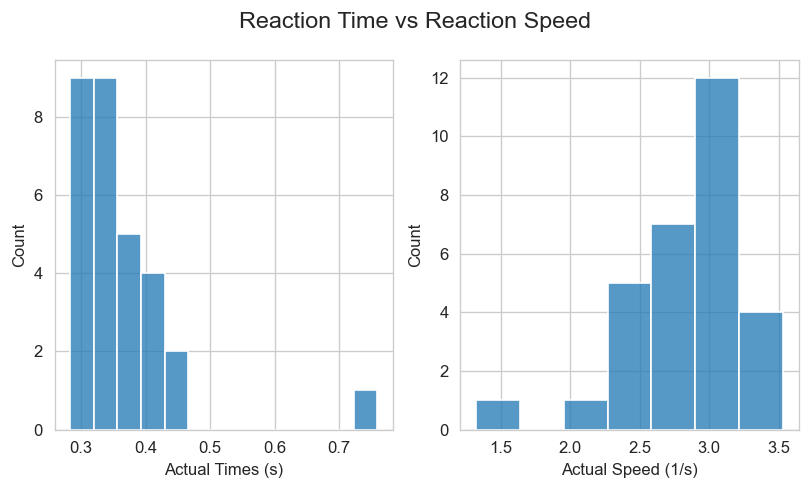

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(df_elapsed.iloc[:, 1], bins='auto', ax=axs[0])
sns.histplot(1/df_elapsed.iloc[:, 1], bins='auto', ax=axs[1])

axs[0].set_xlabel('Actual Times (s)')
axs[1].set_xlabel('Actual Speed (1/s)')
fig.suptitle("Reaction Time vs Reaction Speed", fontsize=14)

Text(0.5, 1.0, 'ExGaussian(5.19, 0.30, 0.01)')

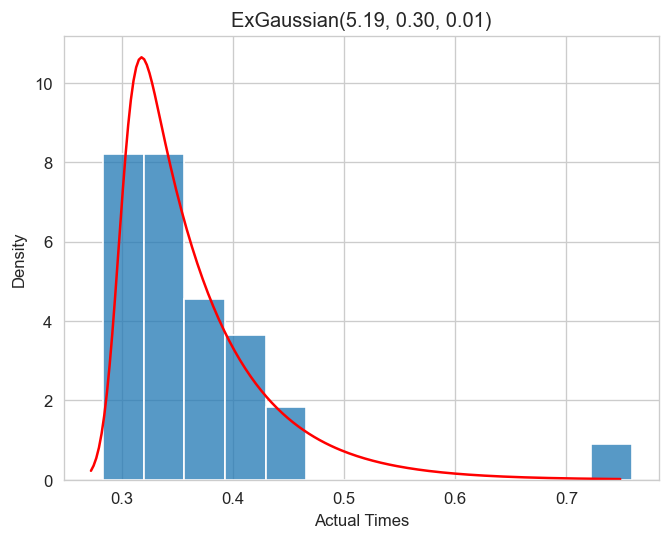

In [21]:
import numpy as np 
from scipy.stats import exponnorm

params = exponnorm.fit(df_elapsed.iloc[:,1])
rv = exponnorm(*params)
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 200)

ax = sns.histplot(df_elapsed.iloc[:,1], bins='auto', stat='density')
ax.plot(x, rv.pdf(x), 'r-')
ax.set_title(f"ExGaussian({', '.join([f'{p:.2f}' for p in params])})")

c:\Users\delbe\Documents\CodeRepositories\ScienceClub\venv\lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\delbe\Documents\CodeRepositories\ScienceClub\venv\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 1.0, 'Beta(2208674.14, 3.51, -513273.01, 513276.67)')

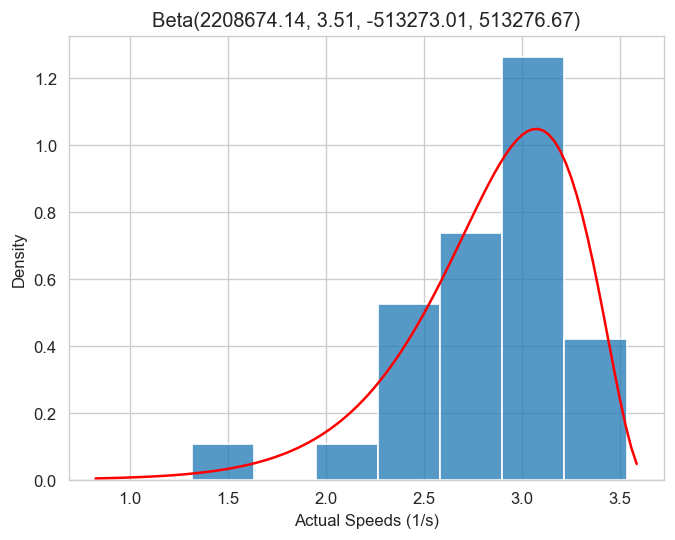

In [22]:
from scipy.stats import beta

df_elapsed['Actual Speeds'] = 1/df_elapsed.iloc[:,1]

params = beta.fit(df_elapsed['Actual Speeds'])
rv_beta = beta(*params)
x = np.linspace(rv_beta.ppf(0.001), rv_beta.ppf(0.999), 100)

ax = sns.histplot(df_elapsed['Actual Speeds'], bins='auto', stat='density')
ax.plot(x, rv_beta.pdf(x), 'r-')
ax.set_xlabel("Actual Speeds (1/s)")
ax.set_title(f"Beta({', '.join([f'{p:.2f}' for p in params])})")